In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Data Exploration and Visualization

In [16]:
# Read the CSV file into a DataFrame
df = pd.read_csv('datasets_house_prices.csv')

# Display the first few rows of the DataFrame
df.head()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
0,3974,1,97,2.032719,1.162771e+06
1,1660,5,88,23.695207,4.900021e+05
2,2094,4,49,6.440232,6.400737e+05
3,1930,2,28,8.129315,5.637881e+05
4,1895,1,56,5.358837,5.651289e+05


In [17]:
# Display basic information about the dataset
df.info()

# Display basic statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age                            1000 non-null   int64  
 3   Proximity to Downtown (miles)  1000 non-null   float64
 4   Price                          1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB


,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2429.857000,2.993000,48.335000,15.289063,7.190532e+05
std,929.914229,1.424423,29.203384,8.546139,2.789818e+05
min,801.000000,1.000000,0.000000,0.500343,2.159455e+05
25%,1629.500000,2.000000,22.000000,8.475528,4.789045e+05
50%,2430.500000,3.000000,47.000000,15.239628,7.128781e+05
75%,3254.250000,4.000000,74.000000,22.765188,9.680664e+05
max,3997.000000,5.000000,99.000000,29.935715,1.212350e+06


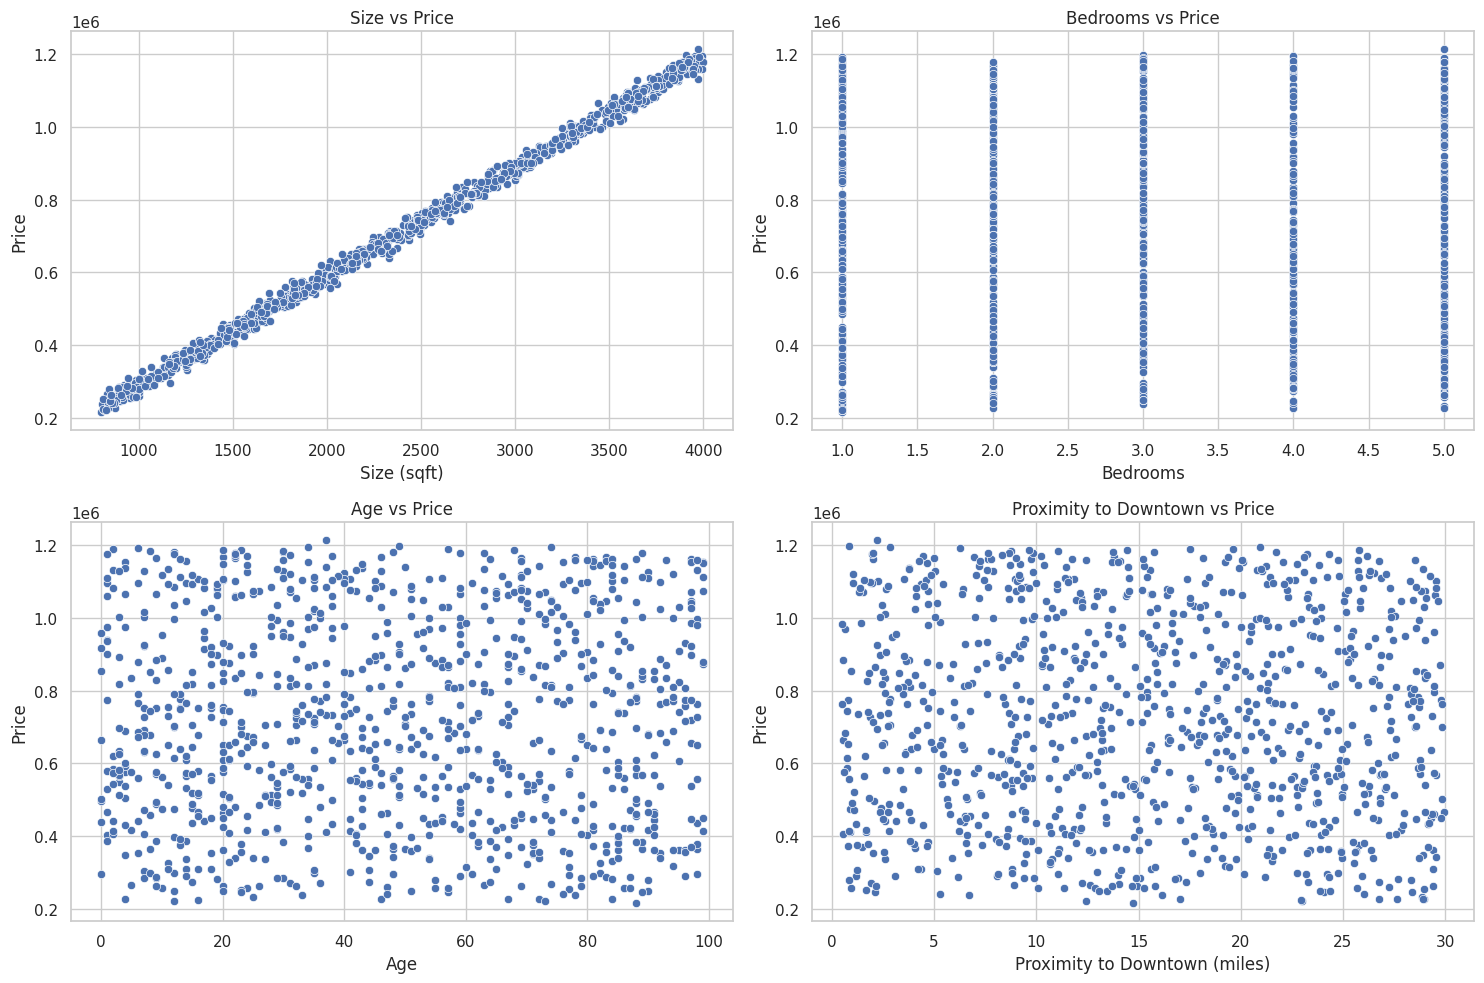

In [18]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create scatter plots to visualize relationships
plt.figure(figsize=(15, 10))

# Size vs Price
plt.subplot(2, 2, 1)
sns.scatterplot(x='Size (sqft)', y='Price', data=df)
plt.title('Size vs Price')

# Bedrooms vs Price
plt.subplot(2, 2, 2)
sns.scatterplot(x='Bedrooms', y='Price', data=df)
plt.title('Bedrooms vs Price')

# Age vs Price
plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Price', data=df)
plt.title('Age vs Price')

# Proximity to Downtown vs Price
plt.subplot(2, 2, 4)
sns.scatterplot(x='Proximity to Downtown (miles)', y='Price', data=df)
plt.title('Proximity to Downtown vs Price')

plt.tight_layout()
plt.show()


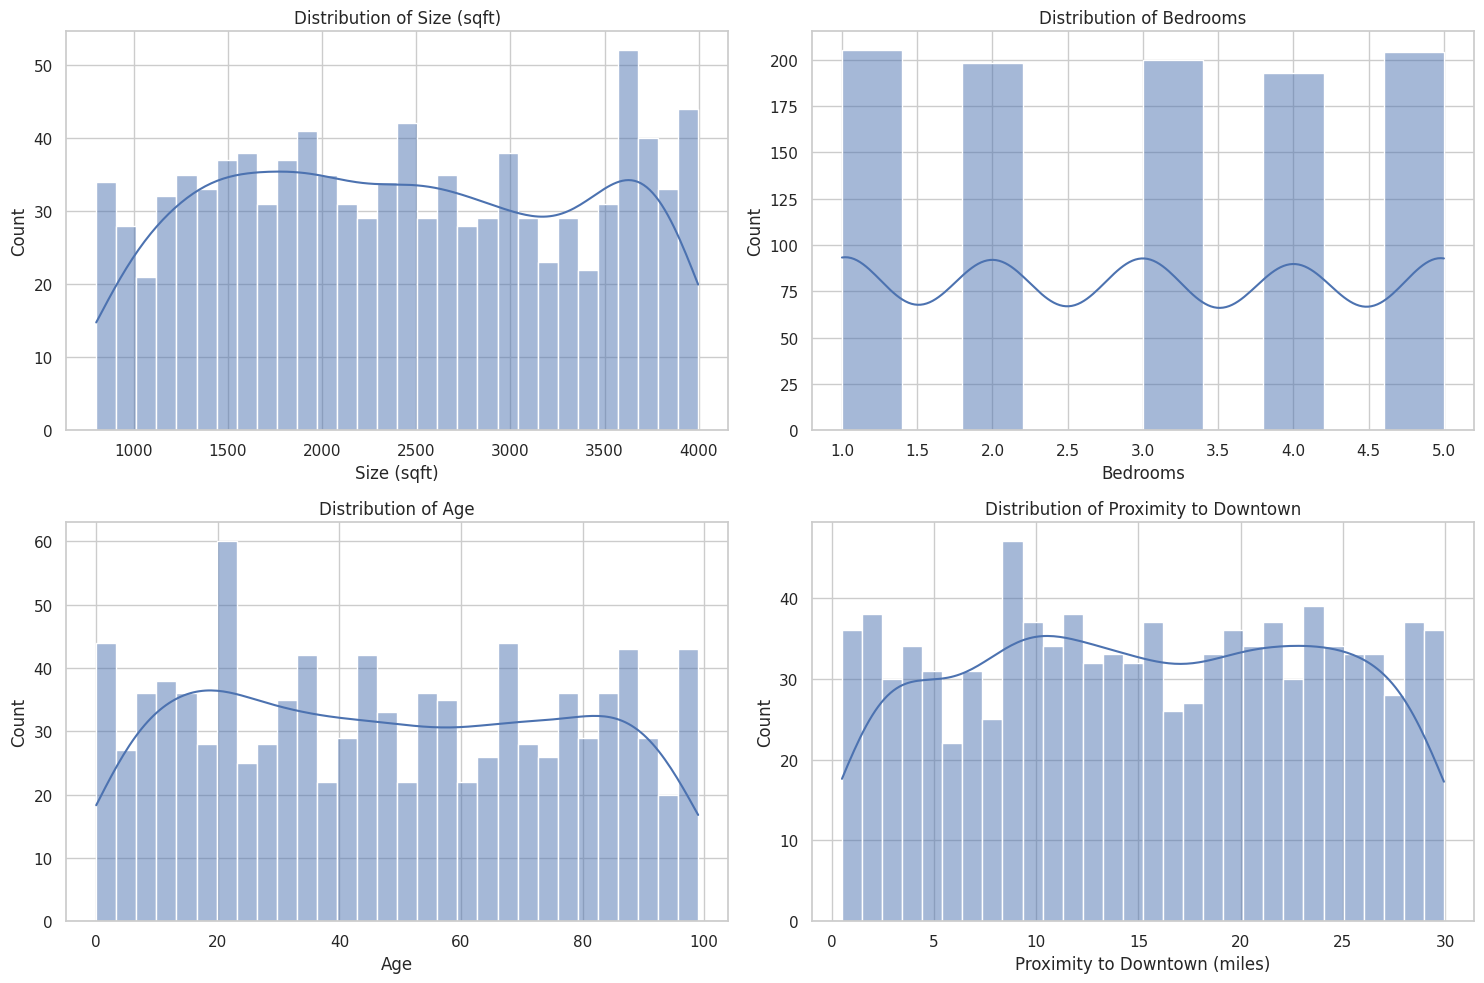

In [19]:
plt.figure(figsize=(15, 10))

# Histograms for each feature and target variable
plt.subplot(2, 2, 1)
sns.histplot(df['Size (sqft)'], bins=30, kde=True)
plt.title('Distribution of Size (sqft)')

plt.subplot(2, 2, 2)
sns.histplot(df['Bedrooms'], bins=10, kde=True)
plt.title('Distribution of Bedrooms')

plt.subplot(2, 2, 3)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 4)
sns.histplot(df['Proximity to Downtown (miles)'], bins=30, kde=True)
plt.title('Distribution of Proximity to Downtown')

plt.tight_layout()
plt.show()


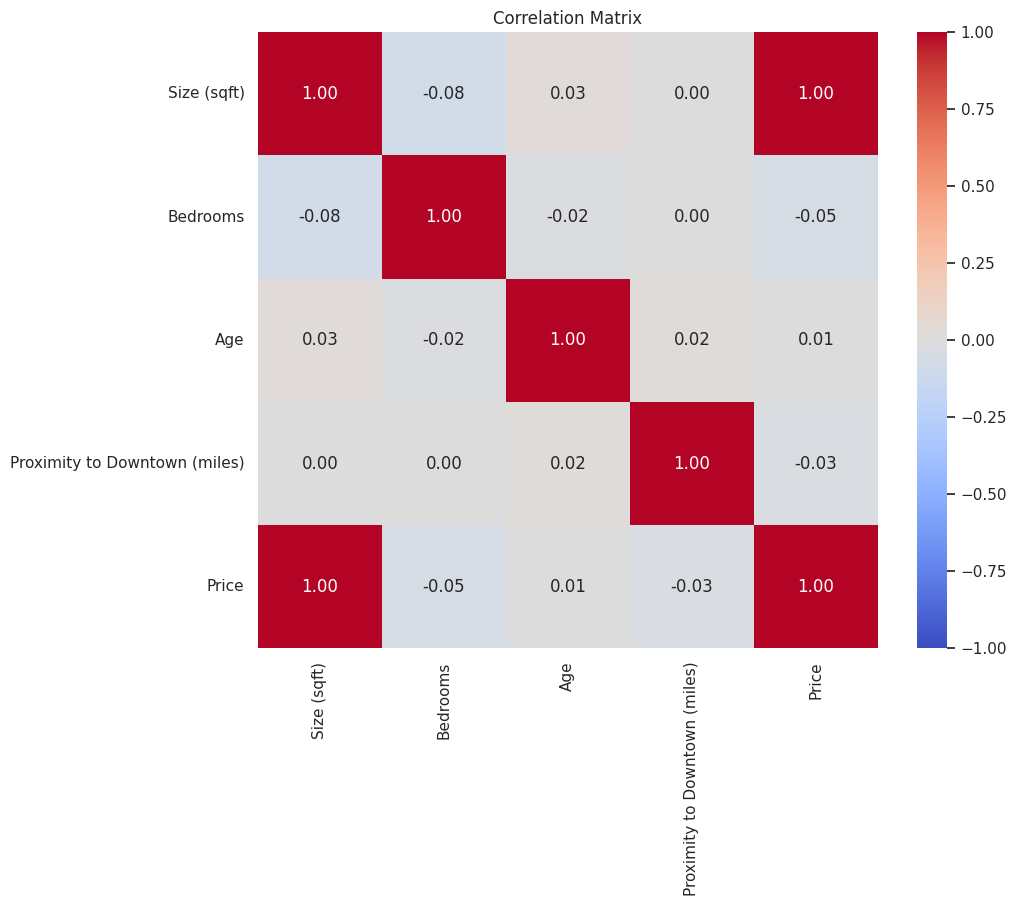

In [20]:
# Compute the correlation matrix
corr = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


# 2. Data Preprocessing

In [21]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing values in each column:\n", missing_data)

# Handling missing data
# Option 1: Drop rows with missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values (if there are any)
# Example: Fill missing values with the mean of the column
# df_filled = df.fillna(df.mean())


Missing values in each column:
 Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [22]:
# Select features to normalize or standardize
features = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']

# Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features] = scaler.fit_transform(df[features])

# Standardization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[features] = scaler.fit_transform(df[features])


In [23]:
# Step 1: Handle Missing Data
missing_data = df.isnull().sum()
print("Missing values in each column:\n", missing_data)

# Drop rows with missing values (or fill them if necessary)
df_cleaned = df.dropna()  # Use df_filled if you choose to fill missing values

# Step 2: Normalize or Standardize the Data
features = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']

# Normalize
scaler = MinMaxScaler()
df_normalized = df_cleaned.copy()
df_normalized[features] = scaler.fit_transform(df_cleaned[features])

# Standardize
scaler = StandardScaler()
df_standardized = df_cleaned.copy()
df_standardized[features] = scaler.fit_transform(df_cleaned[features])

# Display the first few rows of the normalized and standardized data
print("Normalized Data:\n", df_normalized.head())
print("Standardized Data:\n", df_standardized.head())


Missing values in each column:
 Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64
Normalized Data:
    Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)  \
0     0.992804      0.00  0.979798                       0.052059   
1     0.268773      1.00  0.888889                       0.787993   
2     0.404568      0.75  0.494949                       0.201794   
3     0.353254      0.25  0.282828                       0.259177   
4     0.342303      0.00  0.565657                       0.165056   

          Price  
0  1.162771e+06  
1  4.900021e+05  
2  6.400737e+05  
3  5.637881e+05  
4  5.651289e+05  
Standardized Data:
    Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)  \
0     1.661353 -1.399863  1.667250                      -1.551926   
1    -0.828294  1.409697  1.358913                       0.984111   
2    -0.3613

# 3. Model Development

In [24]:
# Read the CSV file into a DataFrame
df = pd.read_csv('datasets_house_prices.csv')

# Handle missing data
df = df.dropna()

# Select features and target variable
features = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']
target = 'Price'
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set and testing set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error on Training Data: {mse_train}")
print(f"Mean Squared Error on Testing Data: {mse_test}")

# Initialize RFE with the linear regression model
rfe = RFE(model, n_features_to_select=1)
rfe = rfe.fit(X_train, y_train)

# Print the ranking of features
print("Feature Ranking:")
for i in range(X_train.shape[1]):
    print(f"{features[i]}: Rank {rfe.ranking_[i]}")


Mean Squared Error on Training Data: 103389223.16106673
Mean Squared Error on Testing Data: 100214724.6312881
Feature Ranking:
Size (sqft): Rank 3
Bedrooms: Rank 2
Age: Rank 4
Proximity to Downtown (miles): Rank 1


# 4. Model Evaluation

Mean Squared Error on Training Data: 103389223.16106673
Mean Squared Error on Testing Data: 100214724.6312881
R-squared on Training Data: 0.9986973395733084
R-squared on Testing Data: 0.9986314443568995
Adjusted R-squared on Training Data: 0.9986898422471117
Adjusted R-squared on Testing Data: 0.9986128876702134
Model Coefficients:
Size (sqft): 300.15120709416163
Bedrooms: 4779.426707509014
Age: -208.39992713916035
Proximity to Downtown (miles): -990.3989642959737
Intercept: 193.71541779860854


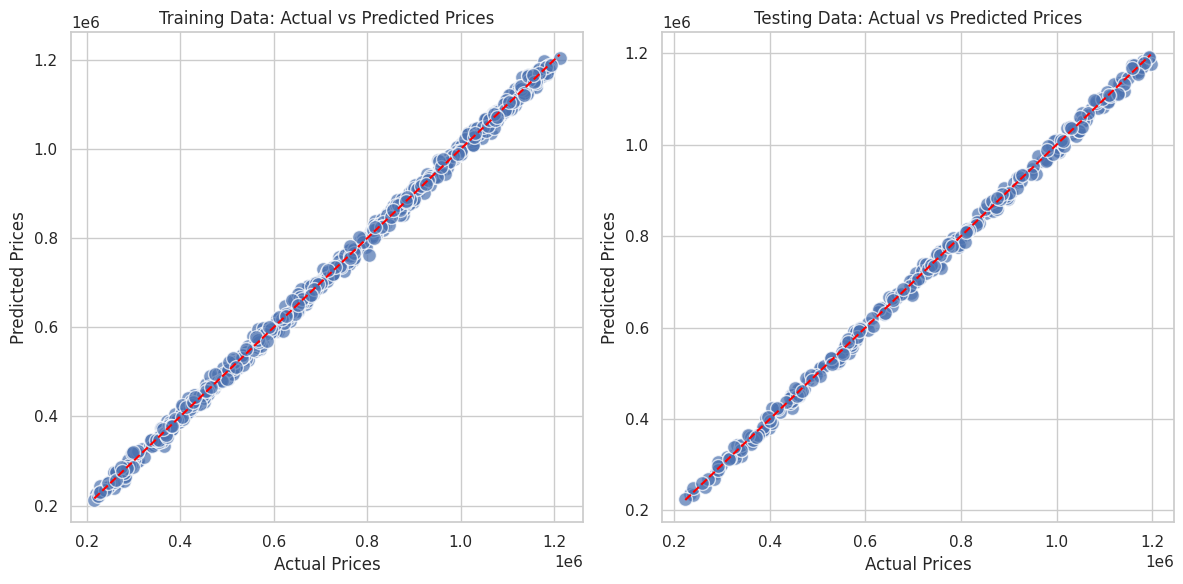

In [25]:
# Read the CSV file into a DataFrame
df = pd.read_csv('datasets_house_prices.csv')

# Handle missing data
df = df.dropna()

# Select features and target variable
features = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']
target = 'Price'
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set and testing set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train = X_train.shape[0]
p = X_train.shape[1]
adj_r2_train = adjusted_r2(r2_train, n_train, p)

n_test = X_test.shape[0]
adj_r2_test = adjusted_r2(r2_test, n_test, p)

print(f"Mean Squared Error on Training Data: {mse_train}")
print(f"Mean Squared Error on Testing Data: {mse_test}")
print(f"R-squared on Training Data: {r2_train}")
print(f"R-squared on Testing Data: {r2_test}")
print(f"Adjusted R-squared on Training Data: {adj_r2_train}")
print(f"Adjusted R-squared on Testing Data: {adj_r2_test}")

# Print the model coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")

print(f"Intercept: {intercept}")

# Plot predicted prices vs actual prices
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, edgecolors='w', s=100)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Training Data: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Plot testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='w', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Testing Data: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()


# Report

Introduction
In this project, we used multiple regression techniques to predict house prices based on several factors. Our goal was to build a model that could help real estate agents estimate house prices more accurately. The dataset included 1,000 houses with details like size, number of bedrooms, age, distance from downtown, and the actual price.

Exploring the Data
First, we took a close look at the data to understand it better. Each of the 1,000 entries had complete information with no missing values. The columns included:

Size (sq. ft.): How big the house is.
Bedrooms: How many bedrooms are in the house.
Age: How old the house is.
Proximity to Downtown (miles): How far the house is from the downtown area.
Price: The actual price of the house.
To prepare the data for analysis, we needed to make sure everything was on a similar scale. We did this in two ways:

Normalization: This scales the data to a range between 0 and 1. It helps in making sure each feature contributes equally to the model.
Standardization: This adjusts the data so that each feature has a mean of 0 and a standard deviation of 1. This makes all features comparable.
Building the Model
We used multiple regression to predict house prices. This method looks at all the features (size, number of bedrooms, age, and proximity to downtown) to determine how they influence the price.

To build our model, we split the data into two parts: training and testing sets. We used 70% of the data to train the model and the remaining 30% to test it. This helps us see how well the model works on new data.

We also ranked the importance of each feature to see which ones have the biggest impact on house prices. The rankings were:

Proximity to Downtown (miles): Most important
Bedrooms: Second most important
Size (sq. ft.): Third most important
Age: Least important
Evaluating the Model
To see how well our model performed, we looked at several metrics:

Mean Squared Error (MSE): This measures how far the predicted prices are from the actual prices. We found that:

Training Data MSE: 103,389,223.16
Testing Data MSE: 100,214,724.63
R-squared: This tells us how well our model explains the variability in house prices. Our model had:

Training Data R-squared: 0.9987
Testing Data R-squared: 0.9986
Adjusted R-squared: This adjusts R-squared for the number of features in the model. Our values were:

Training Data Adjusted R-squared: 0.9987
Testing Data Adjusted R-squared: 0.9986
We also looked at the coefficients of our model, which show how each feature affects the price:

Size (sq. ft.): 300.15
Bedrooms: 4,779.43
Age: -208.40
Proximity to Downtown (miles): -990.40
Intercept: 193.72
Lastly, we compared predicted prices with actual prices using scatter plots. These plots showed that the model’s predictions were very close to the actual prices, indicating good performance.

Conclusion
In summary, our multiple regression model was effective in predicting house prices. The model showed very low error and high R-squared values, indicating it performed well. The proximity to downtown emerged as the most important factor influencing house prices, followed by the number of bedrooms, size, and age of the house.

While the model was accurate, there’s always room for improvement. We could look into adding more features or using more advanced techniques to make the predictions even better. This project highlighted the importance of careful data preparation and thorough model evaluation in building reliable predictive models.